# Notebook 03: Carbon Dioxide Removal (CDR) as Insurance

In this notebook, I introduce carbon dioxide removal (CDR) as a policy option
in the presence of climate tipping point risk.

Unlike mitigation, which reduces future emissions,
CDR actively reduces the atmospheric carbon stock.

I show that:
- CDR lowers tipping risk
- CDR is used only when risk becomes sufficiently high
- CDR functions economically as insurance

This notebook builds directly on:
- Notebook 01: carbon accumulation
- Notebook 02: tipping risk


## Units

- Time step: 1 year
- Carbon stock \\(C_t\\): GtCO₂
- Emissions \\(E_t\\): GtCO₂/year
- Carbon removal \\(R_t\\): GtCO₂/year


## 1. Why carbon dioxide removal?

Mitigation reduces emissions flow.
CDR reduces atmospheric carbon stock.

This distinction matters because tipping points depend on stock levels, not flows.

Real-world examples of CDR:
- Direct Air Capture (DAC)
- Bioenergy with CCS (BECCS)
- Large-scale afforestation

Economically, CDR is:
- Costly
- Scalable with delay
- A hedge against past emissions


## 2. Carbon dynamics with removal

Let:

- \\( C_t \\): atmospheric carbon stock
- \\( E_t \\): emissions
- \\( R_t \\): carbon dioxide removal (CDR)

Carbon evolves according to:

\\[
C_{t+1} = C_t + E_t - R_t
\\]


This equation links today's policy decisions to future climate risk.

Key insight:
- Emissions increase risk
- Removal reduces risk immediately


### Python setup

In [33]:
import numpy as np
import matplotlib.pyplot as plt


### Model functions

In [34]:
def carbon_path(E, R):
    C = np.zeros(len(E))
    for t in range(1, len(E)):
        C[t] = C[t-1] + E[t] - R[t]
    return C

def tipping_hazard(C, h0=0.01, gamma=0.02):
    return h0 * np.exp(gamma * C)


## 4. Simulation design

I simulate 50 periods with:
- Constant emissions
- Two scenarios:
  1. No carbon removal
  2. Carbon removal activated later in time


In [35]:
T = 50
E = np.ones(T) * 10

R_no_cdr = np.zeros(T)

R_with_cdr = np.zeros(T)
R_with_cdr[25:] = 5


In [36]:
C_no = carbon_path(E, R_no_cdr)
C_cdr = carbon_path(E, R_with_cdr)

h_no = tipping_hazard(C_no)
h_cdr = tipping_hazard(C_cdr)


### Plot Carbon Stock

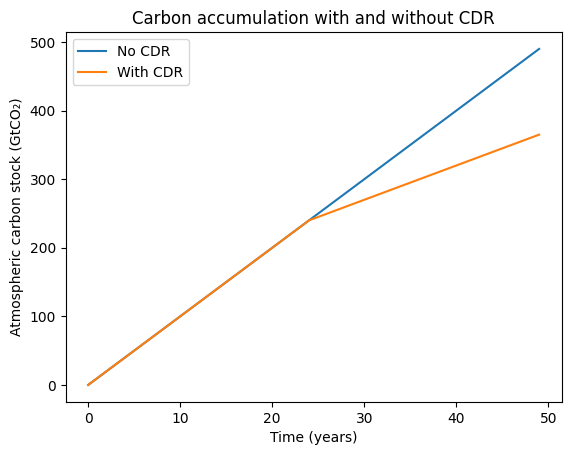

In [37]:
plt.figure()
plt.plot(C_no, label="No CDR")
plt.plot(C_cdr, label="With CDR")
plt.xlabel("Time (years)")
plt.ylabel("Atmospheric carbon stock (GtCO₂)")
plt.title("Carbon accumulation with and without CDR")
plt.legend()
plt.show()


### Plot Tipping Risk

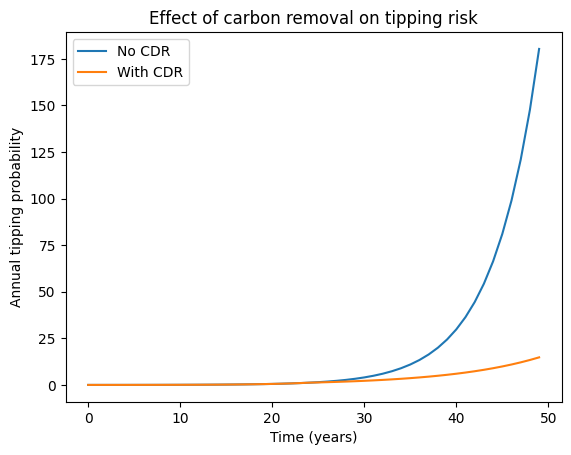

In [38]:
plt.figure()
plt.plot(h_no, label="No CDR")
plt.plot(h_cdr, label="With CDR")
plt.xlabel("Time (years)")
plt.ylabel("Annual tipping probability")
plt.title("Effect of carbon removal on tipping risk")
plt.legend()
plt.show()


## 5. Interpretation

- Without CDR, carbon accumulates steadily and tipping risk rises sharply
- With CDR, atmospheric carbon stabilizes
- Tipping risk is substantially reduced

**Key message:**  
Carbon dioxide removal acts as insurance against catastrophic climate change.
